In [ ]:
# Code by Masoud
# Indivdual Repository setting 

In [2]:
## codec repo
import pandas as pd

df = pd.read_csv('info-codec.csv')
df= df.dropna()
df.head()

,file name,commit massage,commit hash,author name,committer date,number of changed files for commit,old file path,new file path,complexity,nloc,readability before commit,readability after commit,change in readability
0,Base64Test.java,Removed unused local variable.\n\n\ngit-svn-id...,941f00ce535e98f4f45ba838ed92795f7a615508,Gary D. Gregory,2003-05-06 20:45:16+00:00,1,src/test/org/apache/commons/codec/binary/Base6...,src/test/org/apache/commons/codec/binary/Base6...,22,315,0.508406,0.499351,-0.009055
1,Base64.java,Javadoc clean up such that the class descripti...,0e0d47592c8ce9aac136d336c8ac931a06fd6feb,Gary D. Gregory,2003-05-06 20:52:18+00:00,1,src/java/org/apache/commons/codec/binary/Base6...,src/java/org/apache/commons/codec/binary/Base6...,55,296,0.814254,0.808989,-0.005265
2,RefinedSoundex.java,Make URL references into @see links which are ...,282192ceff92d8a71b57e6d6cb75664fbaf412ab,Gary D. Gregory,2003-05-12 17:09:38+00:00,2,src/java/org/apache/commons/codec/language/Ref...,src/java/org/apache/commons/codec/language/Ref...,13,58,0.869659,0.869659,0.000000
3,Soundex.java,Make URL references into @see links which are ...,282192ceff92d8a71b57e6d6cb75664fbaf412ab,Gary D. Gregory,2003-05-12 17:09:38+00:00,2,src/java/org/apache/commons/codec/language/Sou...,src/java/org/apache/commons/codec/language/Sou...,17,63,0.859886,0.859886,0.000000
4,RefinedSoundex.java,Javadocs were swicthed.\n\n\ngit-svn-id: https...,4f10ae2edef970df9f189754e88d7f92f1b536e1,Gary D. Gregory,2003-05-12 17:17:24+00:00,2,src/java/org/apache/commons/codec/language/Ref...,src/java/org/apache/commons/codec/language/Ref...,13,58,0.869659,0.869659,0.000000


In [8]:
# Preprocess commit messages
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# nltk.download('stopwords')
# nltk.download('punkt')

# Define function to clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase and remove non-alphabetic characters
    text = re.sub(r'\bC\b|[^a-zA-Z]', ' ', text.lower())
    # text = re.sub('[^a-zA-Z]', ' ', text.lower())
    
    # Tokenize text and remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Stem tokens
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in filtered_tokens]
    
    # Combine tokens into cleaned text
    cleaned_text = ' '.join(stemmed_tokens)
    
    return cleaned_text

# Apply preprocessing function to commit messages
df['commit massage'] = df['commit massage'].apply(preprocess_text)

# Create binary variable for target
df['delta'] = df['change in readability'].apply(lambda x: 0 if x < 0 else 1)

# Define feature and target variables
X = df[['commit massage', 'complexity', 'nloc']]
y = df['delta']

In [9]:

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train['commit massage'])
X_test_vect = vectorizer.transform(X_test['commit massage'])

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vect, y_train)

RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing set
y_pred = rf.predict(X_test_vect)

# Evaluate the model's performance on the testing set
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7578419071518193
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.52      0.56       231
           1       0.81      0.85      0.83       566

    accuracy                           0.76       797
   macro avg       0.70      0.69      0.69       797
weighted avg       0.75      0.76      0.75       797

Confusion Matrix:
[[121 110]
 [ 83 483]]


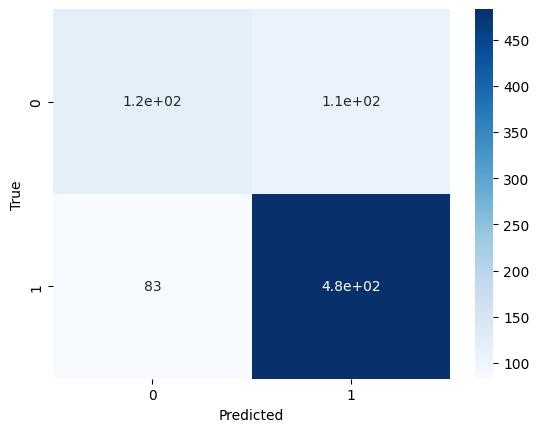

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap visualization of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [14]:
## codec repo
import pandas as pd

df = pd.read_csv('info-vfs.csv')
df= df.dropna()
df.head()

,file name,commit massage,commit hash,author name,committer date,number of changed files for commit,old file path,new file path,complexity,nloc,readability before commit,readability after commit,change in readability
0,AbstractFileObject.java,Fixed the various dependencies of the maven bu...,06b8631ddbb9d7cb18df26982f0d41f6324208b7,James Strachan,2002-07-17 10:23:44+00:00,9,src/java/org/apache/commons/vfs/provider/Abstr...,src/java/org/apache/commons/vfs/provider/Abstr...,93,505,0.878303,0.878303,0.000000
1,FtpFileObject.java,Fixed the various dependencies of the maven bu...,06b8631ddbb9d7cb18df26982f0d41f6324208b7,James Strachan,2002-07-17 10:23:44+00:00,9,src/java/org/apache/commons/vfs/provider/ftp/F...,src/java/org/apache/commons/vfs/provider/ftp/F...,31,160,0.840928,0.840928,0.000000
2,FtpFileSystem.java,Fixed the various dependencies of the maven bu...,06b8631ddbb9d7cb18df26982f0d41f6324208b7,James Strachan,2002-07-17 10:23:44+00:00,9,src/java/org/apache/commons/vfs/provider/ftp/F...,src/java/org/apache/commons/vfs/provider/ftp/F...,11,84,0.925186,0.925186,0.000000
3,DefaultLocalFileSystemProvider.java,Fixed the various dependencies of the maven bu...,06b8631ddbb9d7cb18df26982f0d41f6324208b7,James Strachan,2002-07-17 10:23:44+00:00,9,src/java/org/apache/commons/vfs/provider/local...,src/java/org/apache/commons/vfs/provider/local...,7,55,0.860681,0.860681,0.000000
4,DefaultFileReplicator.java,- File replication is now performed as a privi...,07290fa687309539ecb8ee66b5a326ae7623a4e4,adammurdoch,2002-08-20 02:57:02+00:00,16,src/java/org/apache/commons/vfs/impl/DefaultFi...,src/java/org/apache/commons/vfs/impl/DefaultFi...,6,76,0.799574,0.863718,0.064144


In [15]:
# Preprocess commit messages
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# nltk.download('stopwords')
# nltk.download('punkt')

# Define function to clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase and remove non-alphabetic characters
    text = re.sub(r'\bC\b|[^a-zA-Z]', ' ', text.lower())
    # text = re.sub('[^a-zA-Z]', ' ', text.lower())
    
    # Tokenize text and remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Stem tokens
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in filtered_tokens]
    
    # Combine tokens into cleaned text
    cleaned_text = ' '.join(stemmed_tokens)
    
    return cleaned_text

# Apply preprocessing function to commit messages
df['commit massage'] = df['commit massage'].apply(preprocess_text)

# Create binary variable for target
df['delta'] = df['change in readability'].apply(lambda x: 0 if x < 0 else 1)

# Define feature and target variables
X = df[['commit massage', 'complexity', 'nloc']]
y = df['delta']

In [16]:

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train['commit massage'])
X_test_vect = vectorizer.transform(X_test['commit massage'])

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vect, y_train)

RandomForestClassifier(random_state=42)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing set
y_pred = rf.predict(X_test_vect)

# Evaluate the model's performance on the testing set
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7848639455782312
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.56      0.62       747
           1       0.81      0.89      0.85      1605

    accuracy                           0.78      2352
   macro avg       0.76      0.73      0.74      2352
weighted avg       0.78      0.78      0.78      2352

Confusion Matrix:
[[ 421  326]
 [ 180 1425]]


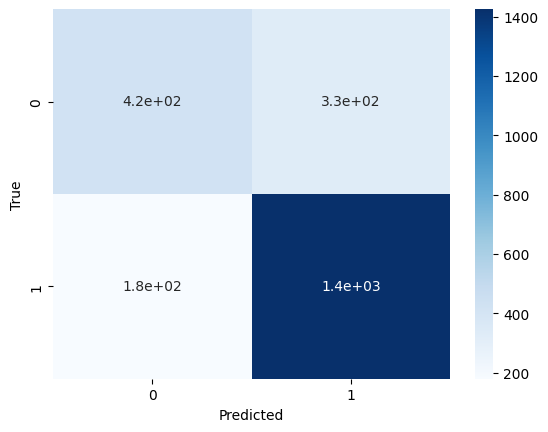

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap visualization of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [21]:
## codec repo
import pandas as pd

df = pd.read_csv('info-bcel.csv')
df= df.dropna()
df.head()

,file name,commit massage,commit hash,author name,committer date,number of changed files for commit,old file path,new file path,complexity,nloc,readability before commit,readability after commit,change in readability
0,Attribute.java,Unknown (non-standard) attributes may be read ...,155734b961e36d08a3eafea830305cec780ec14d,Markus Dahm,2001-11-20 11:41:05+00:00,2,src/java/org/apache/bcel/classfile/Attribute.java,src/java/org/apache/bcel/classfile/Attribute.java,31,110,0.928452,0.925392,-3.059969e-03
1,Pass3bVerifier.java,"Improved a comment, mainly to see if CVS write...",2bd26ca1099e08153cb7c99bfb9091e78a031ef2,Enver Haase,2001-11-28 07:45:40+00:00,1,src/java/org/apache/bcel/verifier/structurals/...,src/java/org/apache/bcel/verifier/structurals/...,49,199,0.741829,0.741829,2.490000e-08
2,ClassLoader.java,Check clazz for null pointer first\n\n\ngit-sv...,81c3c69c50f9e1601fd62067b53626d7a3768315,Markus Dahm,2001-12-14 18:31:18+00:00,1,src/java/org/apache/bcel/util/ClassLoader.java,src/java/org/apache/bcel/util/ClassLoader.java,14,78,0.884869,0.885160,2.910730e-04
3,ClassPath.java,Allow lookup through getResourceAsStream()\n\n...,378638269ebbf81f751aea817b14239fe09d4fb0,Markus Dahm,2001-12-14 18:31:58+00:00,1,src/java/org/apache/bcel/util/ClassPath.java,src/java/org/apache/bcel/util/ClassPath.java,40,162,0.823976,0.823936,-4.010000e-05
4,LocalVariableGen.java,For local variables whose scope end at the las...,24a5aa6b09149f293dd20d0d8bf23068dc3352cd,Markus Dahm,2001-12-14 18:32:54+00:00,1,src/java/org/apache/bcel/generic/LocalVariable...,src/java/org/apache/bcel/generic/LocalVariable...,28,79,0.880927,0.877801,-3.125931e-03


In [22]:
# Preprocess commit messages
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# nltk.download('stopwords')
# nltk.download('punkt')

# Define function to clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase and remove non-alphabetic characters
    text = re.sub(r'\bC\b|[^a-zA-Z]', ' ', text.lower())
    # text = re.sub('[^a-zA-Z]', ' ', text.lower())
    
    # Tokenize text and remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Stem tokens
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in filtered_tokens]
    
    # Combine tokens into cleaned text
    cleaned_text = ' '.join(stemmed_tokens)
    
    return cleaned_text

# Apply preprocessing function to commit messages
df['commit massage'] = df['commit massage'].apply(preprocess_text)

# Create binary variable for target
df['delta'] = df['change in readability'].apply(lambda x: 0 if x < 0 else 1)

# Define feature and target variables
X = df[['commit massage', 'complexity', 'nloc']]
y = df['delta']

In [23]:

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train['commit massage'])
X_test_vect = vectorizer.transform(X_test['commit massage'])

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vect, y_train)

RandomForestClassifier(random_state=42)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing set
y_pred = rf.predict(X_test_vect)

# Evaluate the model's performance on the testing set
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8306581059390048
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.64      0.67       656
           1       0.88      0.90      0.89      1836

    accuracy                           0.83      2492
   macro avg       0.78      0.77      0.78      2492
weighted avg       0.83      0.83      0.83      2492

Confusion Matrix:
[[ 422  234]
 [ 188 1648]]


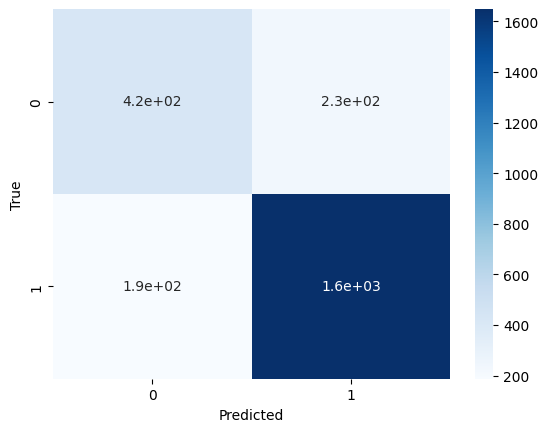

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap visualization of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()